<a href="https://colab.research.google.com/github/octagomez/TP_MARZO2022_REGRESION_LOGISTICA/blob/main/Matrises_20_Ejercicio_TP_MARZO_NARCI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import category_encoders as ce


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MATRIZ 20x3

In [ ]:
# CREO UN VECTOR DE DISTRIBUCION NORMAL 20
da = np.random.normal(loc=0, scale=1, size=10).reshape(10,1)
da2 = np.random.normal(loc=10, scale=15, size=10).reshape(10,1)
da = np.append(da, da2 , axis=0)
da
# CREO UN VECTOR DE DISTRIBUCION UNIFORME
rd = np.random.uniform(low=0, high=1.5, size=10).reshape(10,1)
rd2 = np.random.uniform(low=1.6, high=3, size=10).reshape(10,1)
rd = np.append(rd, rd2 , axis=0)
# CREO UN VECTOR DE DISTRIBUCION SESGADA
rs =np.random.lognormal(2,3,10).reshape(10,1)
rs2 =np.random.lognormal(0,3,10).reshape(10,1)
rs = np.append(rs, rs2 , axis=0)

In [ ]:
# INCORPORO LOS DATOS A UNA MATRIZ
# https://www.delftstack.com/es/howto/numpy/numpy-add-column/#:~:text=append()-,La%20funci%C3%B3n%20numpy.,valores%20a%20el%20array%20preexistente.
XU = np.append(da, rd , axis=1)
# VEO LA MATRIZ
#print("VECTOR NORMAL", da)
#print("VECTOR UNIFORME",rd)
#print("MATRIZ_1", XU)
# INCORPORP LA TERCERA COLUMNA A LA MATRIZ
XU_s = np.append(XU, rs , axis=1)
#print("MATRIZ_2", XU)
XU.shape

print("DISTRIBUCION NORMAL \nMEDIA: ", da.mean(), " // VARIANZA :", da.var()  )

DISTRIBUCION NORMAL 
MEDIA:  6.008268769613196  // VARIANZA : 137.70170893331039


## DEFINO EL VECTOR Y

In [ ]:
# XU_s_t = XU_s.transpose()
# XU_s_t.shape
# y_test_t = pd.DataFrame(XU_s_t)
# y_test_DNORMAL = pd.DataFrame(XU_s ,columns=[0])
# print(XU_x)
print(XU_s)

[[ 3.66319494e-01  1.06922199e+00  1.91822695e+00]
 [-2.14333467e-01  1.32383727e+00  6.79859820e+01]
 [-1.14955930e+00  6.24036673e-01  1.02646071e+01]
 [ 1.55412541e+00  5.66233020e-01  3.93589767e+00]
 [ 1.06449800e-01  1.21011115e+00  3.80978345e-01]
 [ 2.44264972e-01  1.22638211e+00  1.27216802e+00]
 [ 8.95452800e-01  5.98037270e-01  7.99180036e+01]
 [-1.83482666e+00  1.71828357e-01  2.14684162e+00]
 [ 9.49221381e-02  5.37639556e-01  1.30172869e-01]
 [-5.27705817e-01  8.97296128e-01  1.23274382e-01]
 [ 1.80025587e+01  1.93544601e+00  6.55147966e-02]
 [-1.24626846e+01  1.65564036e+00  1.69069830e-01]
 [ 3.67156266e+01  2.43819432e+00  2.55818845e-02]
 [ 1.03149865e+01  1.96500786e+00  7.77720340e+01]
 [-2.38819874e+00  2.54622066e+00  1.05113061e+01]
 [-2.47522619e-01  2.02142132e+00  4.26884314e-02]
 [ 2.63736115e+01  1.87536020e+00  6.00365866e-01]
 [ 4.67140591e+00  1.66746943e+00  2.45809508e-01]
 [-4.39025356e+00  2.12347968e+00  1.75482317e+00]
 [ 2.15441107e+01  2.13762768e+

In [ ]:
y_20 =np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

In [ ]:
print(da.shape)
print(y_20.shape)

(200, 1)
(20,)


In [ ]:
# Asi veremos información estadística básica de nuestro set de datos. La Media, el desvío estándar, 
# valores mínimo y máximo de cada característica:
# VAMOS A CONVERTIR LA MATRIZ DE NP a UN DF 
df = pd.DataFrame(XU_s)
df.describe()

,0,1,2
count,20.000000,20.000000,20.000000
mean,4.883437,1.429525,13.042070
std,11.858616,0.704248,27.050644
min,-12.462685,0.171828,0.025582
25%,-0.683169,0.828981,0.159346
50%,0.175357,1.489739,1.425114
75%,6.082301,1.979111,5.518075
max,36.715627,2.546221,79.918004


Text(0, 0.5, 'Dist. Sesgada')

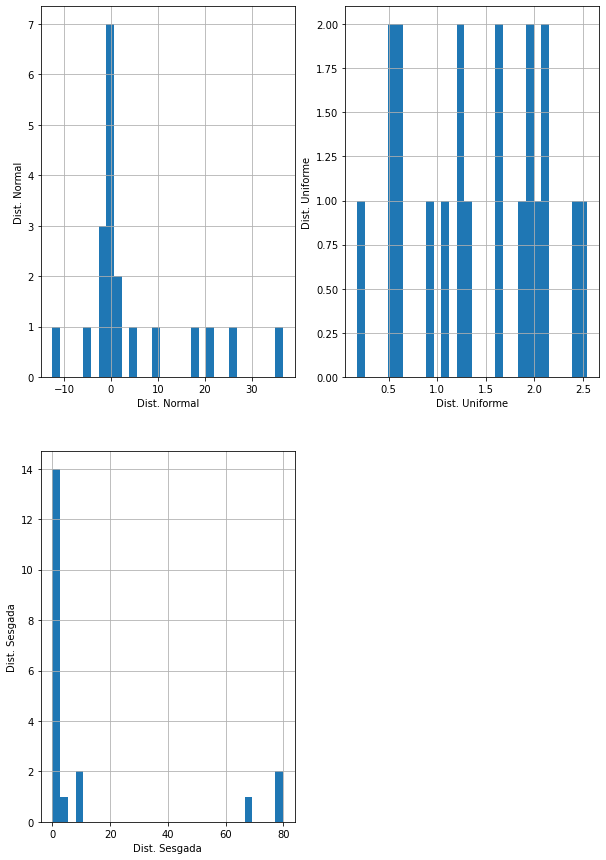

In [ ]:
# Dibujamos los histogramas para checkear la distribución de las variables usando el dataframe df20:
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)
fig =df[0].hist(bins=30)
fig.set_xlabel('Dist. Normal')
fig.set_ylabel('Dist. Normal')

plt.subplot(2,2,2)
fig =df[1].hist(bins=30)
fig.set_xlabel('Dist. Uniforme')
fig.set_ylabel('Dist. Uniforme')

plt.subplot(2,2,3)
fig =df[2].hist(bins=30)
fig.set_xlabel('Dist. Sesgada')
fig.set_ylabel('Dist. Sesgada')


In [ ]:
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression

# instantiate the model
# logreg = LogisticRegression(solver='liblinear', random_state=0) # OBTENGO Model accuracy score: 0.9500 Confusion matrix
                                                                                                          # [[10  0]
                                                                                                          # [ 1  9]]
#logreg = LogisticRegression(solver='newton-cg', random_state=0) # Model accuracy score: 1.0000 Confusion matrix
                                                                                                # [[10  0]
                                                                                                # [ 0 10]]
#logreg = LogisticRegression(solver='sag', random_state=0) # Model accuracy score: 0.9500 Confusion matrix
                                                                                          # [[ 9  1]
                                                                                          # [ 0 10]]
#logreg = LogisticRegression(solver='saga', random_state=0) # Model accuracy score: 0.9000 Confusion matrix
                                                                                          # [[9 1]
                                                                                          # [1 9]]
logreg = LogisticRegression(solver='lbfgs',random_state=0) # Model accuracy score: 1.0000 Confusion matrix
                                                                                          # [[10  0]
                                                                                          # [ 0 10]]

# fit the model
logreg.fit(XU_s, y_20)


LogisticRegression(random_state=0)

In [ ]:
# ESTA ES LA PREDICCION
y_pred_test = logreg.predict(XU_s)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# CALCULO LA PRESICION DEL ALGORITMO DE PREDICCION COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_20, y_pred_test)))

Model accuracy score: 0.9500


In [ ]:
# Creamos nuestra Matriz de Confusión:
# COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_20, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10  0]
 [ 1  9]]

True Positives(TP) =  10

True Negatives(TN) =  9

False Positives(FP) =  0

False Negatives(FN) =  1


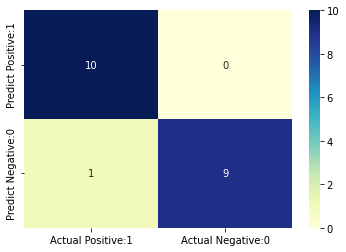

In [ ]:
# Visualizamos la Matriz de Confusión:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# El Informe de Clasificación es otra forma de evaluar el rendimiento del modelo de clasificación.
# Muestra las puntuaciones de precisión, recuperación, f1 y soporte para el modelo:
from sklearn.metrics import classification_report

print(classification_report(y_20, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
# aqui se observa que variable tiene mayor influencia
logreg.coef_

array([[ 0.07234032,  1.95344237, -0.0118739 ]])

## SUPUESTOS DE LA REGRESION LOGISTICA

# SUPUESTO 1 - Tipo de resultado apropiado
REGRESION LOGISTICA: la variable de respuesta es binaria [0,1]



In [ ]:
# EVALUO LA SALIDA (OUTPUT) DEBE TENER  2 VALORES
# la funcion unique de la libreria numpy nos permite leer un array de numpy y su salida son valores unicos
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
print(np.unique(y_20))

[0 1]


In [ ]:
# EVALUO LA CANTIDAD DE VALORES QUE HAY PARA CADA UNO
df_y = pd.DataFrame(y_20)
df_y.groupby([0]).size()

0
0    10
1    10
dtype: int64

## SUPUESTO 2 - Linealidad de variables independientes y probabilidades logarítmicas

REGRESION LOGISTICA: Existe una relación lineal entre las variables explicativas y el logit de la variable de respuesta

# Prueba de caja-Tidwell

Uno de los supuestos importantes de la regresión logística es la linealidad del logit sobre las covariables continuas. Esta suposición significa que las relaciones entre los predictores continuos y el logit (logaritmo de probabilidades) son lineales.
* La transformación de Box-Tidwell (prueba) se puede utilizar para probar la 
linealidad en el supuesto logit cuando se realiza una regresión logística.
* **Comprueba si la transformada logit es una función lineal del predictor, agregando efectivamente la transformada no lineal del predictor original como un término de interacción para probar si esta adición no mejoró la predicción.** 
* Un valor **p estadísticamente significativo** del término de interacción en la transformación de Box-Tidwell **significa que se viola la suposición de linealidad**
* **Si se encuentra que una variable no es lineal**, podemos resolverla incorporando términos polinómicos de orden superior para esa variable en el análisis de regresión para capturar la no linealidad (por ejemplo, x^2). **Otra solución a este problema es la categorización de las variables independientes. Eso es transformar variables métricas a nivel ordinal y luego incluirlas en el modelo.**